In [7]:
#All libraries used in this project
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pypfopt as pf
import yfinance as yf

In [23]:
# Parameters for the Monte Carlo simulation
n_simulations = 1272 # Number of Monte Carlo simulations
n_years = 5  # Time horizon for the portfolio projection (5 years)

# Portfolio weights
weights = {
    "Private Equity": 0.20,
    "Early Stage VC": 0.20,
    "Private Credit": 0.33,
    "Venture Debt":  0.22,
    "Impact Investing": 0.10,
    "Private Real Estate": 0.10,  
    "ELN": 0.05
}

# Expected annual returns and standard deviations (volatility) for each asset class
expected_returns = {
    "Private Equity": 0.12,  # 20% expected return for private equity
    "Early Stage VC": 0.15,
    "Private Credit": 0.06,
    "Venture Debt": 0.08,
    "Impact Investing": 0.06,
    "Private Real Estate": 0.08,  # 10% expected return for private real estate
    "ELN": 0.04  # 6% expected return for ELNs
}

volatility = {
    "Private Equity": 0.15,  # 30% volatility for private equity
    "Early Stage VC": 0.35,
    "Private Credit": 0.06,
    "Venture Debt": 0.10,
    "Impact Investing": 0.10,
    "Private Real Estate": 0.09, #volatility for private real estate
    "ELN": 0.02  # 7% volatility for ELNs
}

# Generate random returns for each asset class using a normal distribution
np.random.seed(42)  # Set seed for reproducibility
private_equity_returns = np.random.normal(expected_returns["Private Equity"], volatility["Private Equity"], (n_simulations, n_years))
real_estate_returns = np.random.normal(expected_returns["Private Real Estate"], volatility["Private Real Estate"], (n_simulations, n_years))
eln_returns = np.random.normal(expected_returns["ELN"], volatility["ELN"], (n_simulations, n_years))
early_vc_returns = np.random.normal(expected_returns["Early Stage VC"], volatility["Early Stage VC"], (n_simulations,n_years))
private_credit_returns = np.random.normal(expected_returns["Private Credit"], volatility["Private Credit"], (n_simulations,n_years))
venture_debt_returns = np.random.normal(expected_returns["Venture Debt"], volatility["Venture Debt"], (n_simulations,n_years))
impact_investing_returns = np.random.normal(expected_returns["Impact Investing"], volatility["Impact Investing"], (n_simulations,n_years))

# Calculate cumulative returns for each asset class over 5 years
cumulative_private_equity = np.prod(1 + private_equity_returns, axis=1) - 1
cumulative_real_estate = np.prod(1 + real_estate_returns, axis=1) - 1
cumulative_early_vc = np.prod(1 + early_vc_returns, axis=1) - 1
cumulative_pc = np.prod(1 + private_credit_returns, axis=1) - 1
cumulative_venture_debt = np.prod(1 + venture_debt_returns, axis=1) - 1
cumulative_impact_investing = np.prod(1 + impact_investing_returns, axis=1) - 1
cumulative_eln = np.prod(1+ eln_returns, axis=1) - 1


# Portfolio return = weighted sum of the returns of each asset class
alt_portfolio_returns = (
    weights["Private Equity"] * cumulative_private_equity +
    weights["Private Real Estate"] * cumulative_real_estate +
    weights["ELN"] * cumulative_eln + 
    weights["Private Credit"] *cumulative_pc +
    weights["Venture Debt"]*cumulative_venture_debt + 
    weights["Early Stage VC"]*cumulative_early_vc+
    weights["Impact Investing"]*cumulative_impact_investing
)

# Create a DataFrame for the results
alt_portfolio = pd.DataFrame({
    'Private Equity 5-Year Return': cumulative_private_equity,
    'Private Real Estate 5-Year Return': cumulative_real_estate,
    'ELN 5-Year Return': cumulative_eln,
    'Private Credit 5-Year Return':cumulative_pc,
    'Venture Debt 5-Year Return':cumulative_venture_debt,
    'Early Stage VC 5-Year Return':cumulative_early_vc,
    'Impact Investing 5-Year Return':cumulative_impact_investing,
    'Portfolio 5-Year Return': alt_portfolio_returns
})

# Summary statistics for the portfolio
summary_portfolio_stats = alt_portfolio.describe()

# Display results to the user
print(alt_portfolio.head())
summary_portfolio_stats

   Private Equity 5-Year Return  Private Real Estate 5-Year Return  \
0                      1.338037                           0.950200   
1                      1.292598                           0.200697   
2                     -0.084852                           0.686883   
3                      0.045471                           0.796709   
4                      0.547652                           0.487179   

   ELN 5-Year Return  Private Credit 5-Year Return  \
0           0.172316                      0.439522   
1           0.262989                      0.477159   
2           0.191104                      0.064361   
3           0.253784                      0.238863   
4           0.242991                      0.701220   

   Venture Debt 5-Year Return  Early Stage VC 5-Year Return  \
0                    0.971840                      0.269769   
1                   -0.341977                     -0.604779   
2                    0.421175                     -0.515961   
3 

,Private Equity 5-Year Return,Private Real Estate 5-Year Return,ELN 5-Year Return,Private Credit 5-Year Return,Venture Debt 5-Year Return,Early Stage VC 5-Year Return,Impact Investing 5-Year Return,Portfolio 5-Year Return
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,0.756592,0.465083,0.219321,0.338405,0.449922,0.960692,0.360570,0.647645
std,0.520928,0.272237,0.052376,0.171277,0.301850,1.433913,0.299261,0.320110
min,-0.564292,-0.352389,0.059828,-0.105731,-0.341977,-1.325038,-0.476066,-0.029348
25%,0.374161,0.273869,0.181235,0.212375,0.244344,-0.058113,0.146359,0.431686
50%,0.706014,0.453488,0.218542,0.324366,0.429138,0.607265,0.333226,0.597000
75%,1.062836,0.645311,0.255535,0.448597,0.639571,1.653628,0.536726,0.811338
max,3.068647,1.715756,0.404245,0.963117,1.617101,10.451970,1.675253,2.701560


In [11]:
#Backtesting the Portfolio

#Establishing benchmarks for the private investments

tickers = ('BKLN IPO BBHY SUSL ^FNER PSP SPY')
data = yf.download(tickers, period='5y')['Adj Close']
data.head()

[*********************100%%**********************]  7 of 7 completed


,BBHY,BKLN,IPO,PSP,SPY,SUSL,^FNER
Date,,,,,,,
2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,782.090027
2019-10-04,38.648026,17.033760,28.337444,42.333687,272.477936,47.062302,785.390015
2019-10-07,38.617012,17.011074,28.426960,42.113964,271.302338,47.285698,786.010010
2019-10-08,38.550488,16.965687,27.810280,41.711128,267.090332,46.866837,785.760010
2019-10-09,38.602654,16.942995,28.088781,42.077339,269.626770,46.866837,786.250000


In [13]:
returns = data.pct_change().dropna()
returns.head()

,BBHY,BKLN,IPO,PSP,SPY,SUSL,^FNER
Date,,,,,,,
2019-10-07,-0.000802,-0.001332,0.003159,-0.005190,-0.004314,0.004747,0.000789
2019-10-08,-0.001723,-0.002668,-0.021693,-0.009565,-0.015525,-0.008858,-0.000318
2019-10-09,0.001353,-0.001338,0.010014,0.008780,0.009497,0.000000,0.000624
2019-10-10,0.000646,-0.001785,-0.004957,0.006963,0.006764,0.008143,-0.001043
2019-10-11,0.003680,0.001341,0.017438,0.017286,0.010367,0.016745,0.001948


In [15]:
weights_bench = {
    "PSP": 0.20, #Private Equity benchmark
    "IPO": 0.20, #Early stage VC benchmark
    "BKLN": 0.33, #Private debt benchmark
    "BBHY":  0.22, #Venture Debt benchmark
    "SUSL": 0.10, #Impact invest benchmark
    "^FNER": 0.10, #Private RE benchmark
    "SPY": 0.05 #ELN benchmark
}

portfolio_bench_return = returns.mul(weights_bench).sum(axis=1)

print(portfolio_bench_return.head())

Date
2019-10-07   -0.000684
2019-10-08   -0.009205
2019-10-09    0.004152
2019-10-10    0.001002
2019-10-11    0.010585
dtype: float64


In [17]:
# Calculate cumulative returns
cumulative_returns_bench = (1 + portfolio_bench_return).cumprod()

# Display the first few rows of the cumulative returns
print(cumulative_returns_bench.head())


# Calculate performance metrics
annualized_return_bench = portfolio_bench_return.mean() * 250  # Assuming daily returns
volatility_bench = portfolio_bench_return.std() * (250**0.5)  # Annualized volatility
sharpe_ratio_bench = annualized_return_bench / volatility_bench

print(f"Annualized Return: {annualized_return_bench}")
print(f"Volatility: {volatility_bench}")
print(f"Sharpe Ratio: {sharpe_ratio_bench}")

# Maximum drawdown
rolling_max = cumulative_returns_bench.cummax()
drawdown = (cumulative_returns_bench - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown}")

Date
2019-10-07    0.999316
2019-10-08    0.990117
2019-10-09    0.994228
2019-10-10    0.995225
2019-10-11    1.005759
dtype: float64
Annualized Return: 0.10804280315653032
Volatility: 0.1970982846740884
Sharpe Ratio: 0.5481671407500291
Maximum Drawdown: -0.37692944119695976


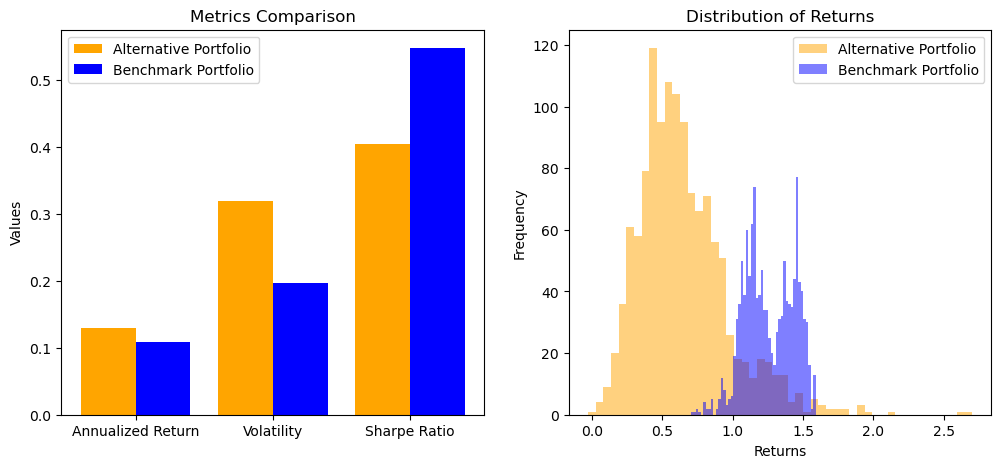

In [25]:
# Alternative Portfolio Metrics (Monte Carlo-based)
alt_annualized_return = alt_portfolio['Portfolio 5-Year Return'].mean() / 5
alt_volatility = alt_portfolio['Portfolio 5-Year Return'].std()
alt_sharpe_ratio = alt_annualized_return / alt_volatility

# Benchmark Portfolio Metrics (Backtest-based)
bench_metrics = {
    "Annualized Return": annualized_return_bench,
    "Volatility": volatility_bench,
    "Sharpe Ratio": sharpe_ratio_bench,
}

# Plot side-by-side bar charts for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Metric values for alternative portfolio and benchmark
metrics = ['Annualized Return', 'Volatility', 'Sharpe Ratio']
alt_metrics = [alt_annualized_return, alt_volatility, alt_sharpe_ratio]
bench_metrics_values = list(bench_metrics.values())

# Bar chart for metrics comparison
x = range(len(metrics))
ax[0].bar(x, alt_metrics, color='orange', width=0.4, label='Alternative Portfolio')
ax[0].bar([i + 0.4 for i in x], bench_metrics_values, color='blue', width=0.4, label='Benchmark Portfolio')
ax[0].set_xticks([i + 0.2 for i in x])
ax[0].set_xticklabels(metrics)
ax[0].set_ylabel('Values')
ax[0].set_title('Metrics Comparison')
ax[0].legend()

# Performance comparison
alt_portfolio['Portfolio 5-Year Return'].plot.hist(alpha=0.5, color='orange', label='Alternative Portfolio', bins=50, ax=ax[1])
cumulative_returns_bench.plot.hist(alpha=0.5, color='blue', label='Benchmark Portfolio', bins=50, ax=ax[1])
ax[1].set_title('Distribution of Returns')
ax[1].set_xlabel('Returns')
ax[1].legend()

plt.show()

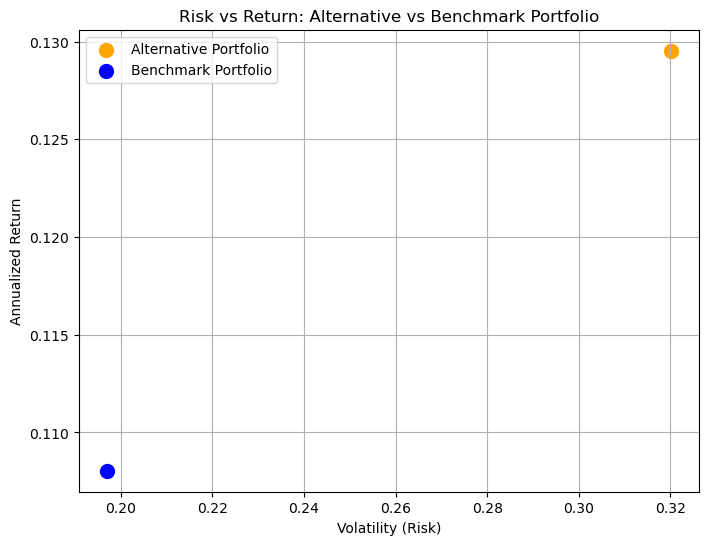

In [27]:
# Metrics for scatter plot
alt_annualized_return = alt_portfolio['Portfolio 5-Year Return'].mean() / 5
alt_volatility = alt_portfolio['Portfolio 5-Year Return'].std()

# Alternative Portfolio Metrics
bench_annualized_return = annualized_return_bench
bench_volatility = volatility_bench

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(alt_volatility, alt_annualized_return, color='orange', label='Alternative Portfolio', s=100)
plt.scatter(bench_volatility, bench_annualized_return, color='blue', label='Benchmark Portfolio', s=100)

# Add labels
plt.title('Risk vs Return: Alternative vs Benchmark Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

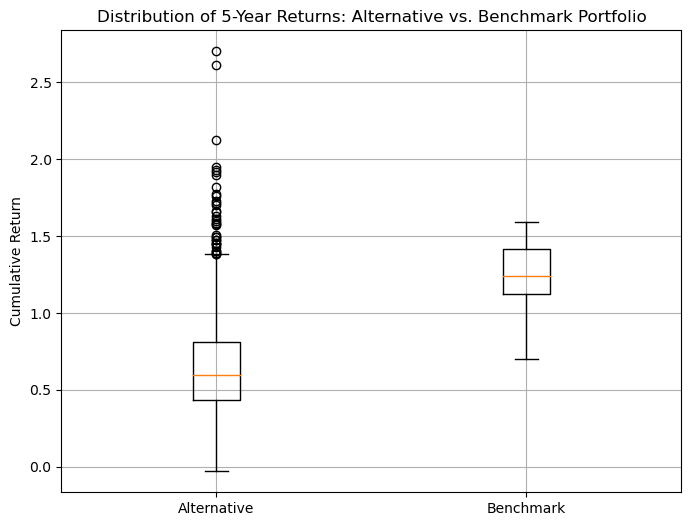

In [33]:
plt.figure(figsize=(8, 6))

# Box plot for comparison
plt.boxplot([alt_portfolio['Portfolio 5-Year Return'], cumulative_returns_bench], labels=['Alternative', 'Benchmark'])

plt.title('Distribution of 5-Year Returns: Alternative vs. Benchmark Portfolio')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()